# Opiniones.csv

<p id="tocheading">Tabla de Contenidos</p>
<br>
<div id="toc"></div>

## Primeros pasos

El primer paso consiste en importar los datos del archivo "opiniones.csv" a nuestro dataframe "df".

Cabe mencionar que cuando tratamos de hacer esto por primera vez, leyendo los datos del csv como con los demás archivos, nos daba un error de "unexpected end of data" en la línea 599579 del archivo. Al mirar manualmente en el archivo no encontramos ningún error por lo que decidimos omitir esa única línea añadiendo el atributo "error_bad_lines = False" a la función de pd.read__csv.

El segundo paso consiste en un preprocesado de los datos eliminando las columnas que creemos innecesarias en este archivo. Al ser cada línea una opinión distinta, podemos eliminar la columna "opinion_id". También pensamos inicialmente en eliminar las columnas de "usuario_id" y "negocio_id" pero al haber encontrado comentarios y usuarios sospechosos en el archivo de "consejos.json", decidimos que los usaríamos más adelante.

In [1]:
import pandas as pd
#pd.set_option('display.max_colwidth', -1)
df = pd.read_csv('./Datos/datos_opiniones.csv', sep=',', decimal= '.', quotechar='"', engine='python', error_bad_lines=False)
df = df.drop(['opinion_id'], axis=1)
df.head(10)

Skipping line 599579: unexpected end of data


,usuario_id,negocio_id,puntuacion,util,divertido,guay,texto,fecha
0,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over dol...,2013-05-07 04:34:36
1,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38
5,w31MKYsNFMrjhWxxAb5wIw,eU_713ec6fTGNO4BegRaww,4.0,0,0,0,I'll be the first to admit that I was not exci...,2013-01-20 13:25:59
6,jlu4CztcSxrKx56ba1a5AQ,3fw2X5bZYeW9xCz_zGhOHg,3.0,5,4,5,Tracy dessert had a big name in Hong Kong and ...,2016-05-07 01:21:02
7,d6xvYpyzcfbF_AZ8vMB7QA,zvO-PJCpNk4fgAVUnExYAA,1.0,3,1,1,This place has gone down hill. Clearly they h...,2010-10-05 19:12:35
8,sG_h0dIzTKWa3Q6fmb4u-g,b2jN2mm9Wf3RcrZCgfo1cg,2.0,1,0,0,I was really looking forward to visiting after...,2015-01-18 14:04:18
9,nMeCE5-xsdleyxYuNZ_7rA,oxwGyA17NL6c5t1Etg5WgQ,3.0,1,0,1,It's a giant Best Buy with 66 registers. I do...,2012-02-29 21:52:43


A continuación, pasamos a analizar con la función "describe()" cada uno de los atributos numéricos de nuestro dataframe. Estos son: puntuación, que indica de 1 a 5 estrellas la puntuación que da el usuario al negocio; y los tres atributos de útil, divertido y guay que muestran las veces que una opinión ha sido marcada con cada una de esos calificativos.

## Análisis de datos numéricos

### Análisis de todos las opiniones

In [2]:
df.describe()

,puntuacion,util,divertido,guay
count,599577.000000,599577.000000,599577.000000,599577.000000
mean,3.722998,1.329135,0.461012,0.561478
std,1.460114,3.091651,1.760453,2.144102
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000,0.000000
max,5.000000,215.000000,183.000000,207.000000


Con los resultados obtenidos podemos apreciar lo siguiente:

- De media, las opiones tienen 3.72 de puntuación y 1.33 marcas de útil, 0.46 de divertido y 0.5 de guay.
- Los usuarios suelen marcar las opiones de los demás como "útiles" con mas frecuencia que "guays", y "guays" con más frecuencia que "divertidas".
- Más del 50% de las opiniones no tienen ninguna marca de "útil".
- Más del 75% de las opiniones no tienen ninguna marca de "guay".
- Más del 75% de las opiniones no tienen ninguna marca de "divertido".
- Los datos de las marcas son claramente asimétricos favoreciendo el lado izquierdo (left skewness).

Con estos datos podemos obtener los siguientes histogramas:

AxesSubplot(0.125,0.125;0.775x0.755)


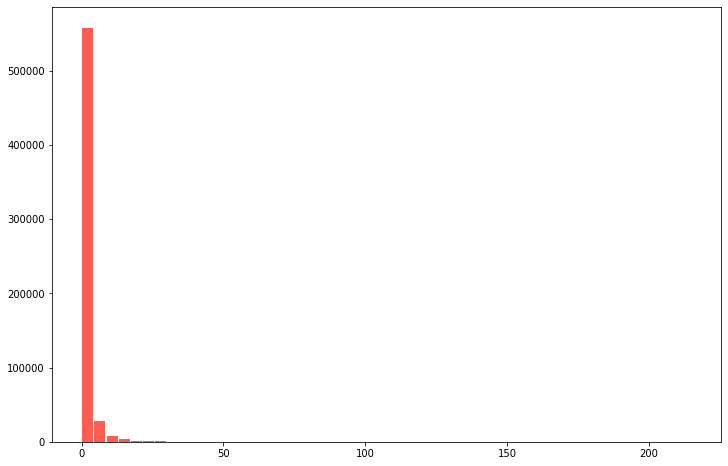

In [6]:
import math

print(df['util'].hist(bins=50, grid=False, figsize=(12,8), color='#ff5d52', zorder=2, rwidth=0.9))

AxesSubplot(0.125,0.125;0.775x0.755)


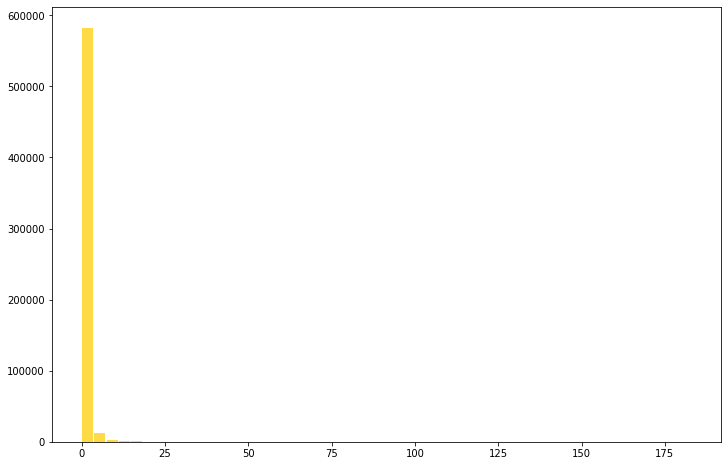

In [4]:
print(df['divertido'].hist(bins=50, grid=False, figsize=(12,8), color='#ffda47', zorder=2, rwidth=0.9))

AxesSubplot(0.125,0.125;0.775x0.755)


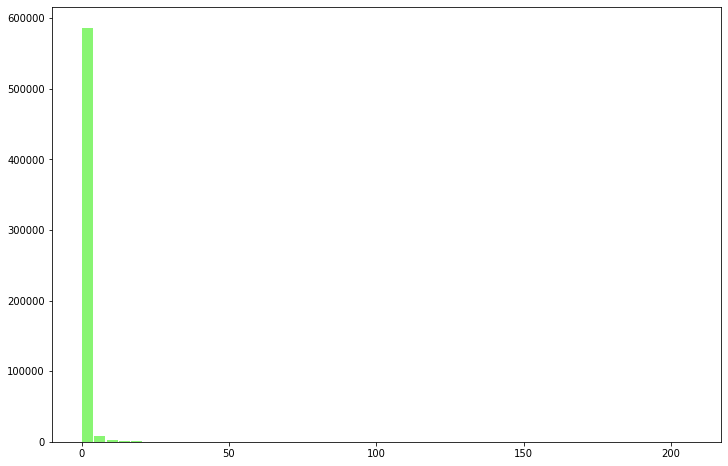

In [5]:
print(df['guay'].hist(bins=50, grid=False, figsize=(12,8), color='#89f573', zorder=2, rwidth=0.9))

En estos histogramas no podemos apreciar bien la distribución de los datos por lo que vamos a proceder a eliminar del dataframe aquellas instancias que no tengan ninguna marca ni de "útil" ni de "divertido" ni de "guay".

Para ello, el primer paso es crear una columna extra que sume los valores de las tres marcas posibles. A continuación eliminaremos del dataframe aquellas instancias que tienen un valor de "0" en esta nueva columna creada.

### Análisis de opiniones con votos > 0

In [7]:
df1 = df
votos = []
for i in range(len(df['util'])):
    votos.append(df['util'].iloc[i]+df['divertido'].iloc[i]+df['guay'].iloc[i])
df1['votos_totales'] = votos

In [8]:
df.head(10)

,usuario_id,negocio_id,puntuacion,util,divertido,guay,texto,fecha,votos_totales
0,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over dol...,2013-05-07 04:34:36,7
1,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,0
2,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03,3
3,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,0
4,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,7
5,w31MKYsNFMrjhWxxAb5wIw,eU_713ec6fTGNO4BegRaww,4.0,0,0,0,I'll be the first to admit that I was not exci...,2013-01-20 13:25:59,0
6,jlu4CztcSxrKx56ba1a5AQ,3fw2X5bZYeW9xCz_zGhOHg,3.0,5,4,5,Tracy dessert had a big name in Hong Kong and ...,2016-05-07 01:21:02,14
7,d6xvYpyzcfbF_AZ8vMB7QA,zvO-PJCpNk4fgAVUnExYAA,1.0,3,1,1,This place has gone down hill. Clearly they h...,2010-10-05 19:12:35,5
8,sG_h0dIzTKWa3Q6fmb4u-g,b2jN2mm9Wf3RcrZCgfo1cg,2.0,1,0,0,I was really looking forward to visiting after...,2015-01-18 14:04:18,1
9,nMeCE5-xsdleyxYuNZ_7rA,oxwGyA17NL6c5t1Etg5WgQ,3.0,1,0,1,It's a giant Best Buy with 66 registers. I do...,2012-02-29 21:52:43,2


In [9]:
df1 = df[ df['votos_totales'] > 0]
df1.head(10)

,usuario_id,negocio_id,puntuacion,util,divertido,guay,texto,fecha,votos_totales
0,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over dol...,2013-05-07 04:34:36,7
2,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03,3
4,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,7
6,jlu4CztcSxrKx56ba1a5AQ,3fw2X5bZYeW9xCz_zGhOHg,3.0,5,4,5,Tracy dessert had a big name in Hong Kong and ...,2016-05-07 01:21:02,14
7,d6xvYpyzcfbF_AZ8vMB7QA,zvO-PJCpNk4fgAVUnExYAA,1.0,3,1,1,This place has gone down hill. Clearly they h...,2010-10-05 19:12:35,5
8,sG_h0dIzTKWa3Q6fmb4u-g,b2jN2mm9Wf3RcrZCgfo1cg,2.0,1,0,0,I was really looking forward to visiting after...,2015-01-18 14:04:18,1
9,nMeCE5-xsdleyxYuNZ_7rA,oxwGyA17NL6c5t1Etg5WgQ,3.0,1,0,1,It's a giant Best Buy with 66 registers. I do...,2012-02-29 21:52:43,2
11,-mA3-1mN4JIEkqOtdbNXCQ,mRUVMJkUGxrByzMQ2MuOpA,1.0,0,1,0,"Walked in around 4 on a Friday afternoon, we s...",2017-12-15 23:27:08,1
14,TpyOT5E16YASd7EWjLQlrw,AakkkTuGZA2KBodKi2_u8A,1.0,1,1,0,I cannot believe how things have changed in 3 ...,2012-07-16 00:37:14,2
17,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3.0,1,7,1,I love chinese food and I love mexican food. W...,2015-04-01 16:30:00,9


Una vez nos hemos quedado solo con las opiones que otros usuarios han considerado relevantes ya sea por que son "útiles", "guays" o "divertidas", pasamos a analizar de nuevo los datos del dataframe con la función "describe()".

In [10]:
df1.describe()

,puntuacion,util,divertido,guay,votos_totales
count,314475.000000,314475.000000,314475.000000,314475.000000,314475.000000
mean,3.552565,2.534125,0.878963,1.070511,4.483600
std,1.508887,3.894902,2.354051,2.867061,8.286888
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,0.000000,0.000000,1.000000
50%,4.000000,1.000000,0.000000,0.000000,2.000000
75%,5.000000,3.000000,1.000000,1.000000,5.000000
max,5.000000,215.000000,183.000000,207.000000,605.000000


Lo primero que podemos ver es que el número de instancias ha disminuído casi un 50%, de 599577 a tan sólo 314475.

Cabe mencionar lo siguiente sobre los valores obtenidos ahora comparado con los anteriores:

- La media de las puntuaciones ha disminuido desde 3.72 hasta 3.55.
- Una vez eliminadas las instancias que no tienen ninguna marca podemos confirmar, otra vez, que los usuarios suelen marcar con más frecuencia las opiniones como "útiles", después "guays" y despues "divertidas".
- Aún eliminando aquellas opiniones sin ninguna marca, más del 50% de las opiniones no tienen ninguna marca de "guay" ni "divertido".
- Los datos de las marcas siguen siendo muy asimétricos favoreciendo el lado izquierdo (left skewness).


Para analizar más precisamente aquellas opiniones que otros usuarios han marcado, decidimos volver a cribar las opiniones, esta vez quedándonos con aquellas que tengan al menos 5 votos o marcas.

### Análisis de opiniones con votos > 5

In [11]:
df1 = df1[ df1['votos_totales'] > 5]
df1.head(10)

,usuario_id,negocio_id,puntuacion,util,divertido,guay,texto,fecha,votos_totales
0,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over dol...,2013-05-07 04:34:36,7
4,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,7
6,jlu4CztcSxrKx56ba1a5AQ,3fw2X5bZYeW9xCz_zGhOHg,3.0,5,4,5,Tracy dessert had a big name in Hong Kong and ...,2016-05-07 01:21:02,14
17,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3.0,1,7,1,I love chinese food and I love mexican food. W...,2015-04-01 16:30:00,9
21,5JVY32_bmTBfIGpCCsnAfw,Mem13A3C202RzT53npn4NA,5.0,9,6,9,If you are looking for the best pierogies in P...,2017-05-13 10:41:43,24
26,vDr8hBNYigiY70fk1kF5iQ,hd5xm20tfSa70-6UqD9-bg,1.0,7,1,1,"Unfortunately, I must recommend not to conduct...",2014-08-10 22:07:35,9
31,1fi6x4tnJtlVWaJmoIO9XA,XTzKRvWciP_BZ9imk8mmPQ,1.0,5,1,0,I tried this place because my girls are away f...,2014-06-27 21:32:31,6
39,tAcB1ZohRtjozsymvqqHzQ,m7ommfJFalI47UksyX04Iw,1.0,6,2,1,Met a friend for dinner there tonight. The ser...,2014-09-25 08:15:44,9
57,0FMte0z-repSVWSJ_BaQTg,WsdmzI2giWHcRN2plprxIg,2.0,5,14,4,Took my kids here to hang out on one fine 72 d...,2013-05-28 21:06:57,23
62,DoRCeCcJbrsM2BiAKj3trA,SU56w479vUfFHsvmvQIf7A,4.0,7,5,6,So good! They didn't make it to 5 stars due to...,2016-07-25 03:55:20,18


In [12]:
df1.describe()

,puntuacion,util,divertido,guay,votos_totales
count,64698.000000,64698.000000,64698.000000,64698.000000,64698.000000
mean,3.399394,6.948793,2.966753,3.463136,13.378682
std,1.524456,6.730187,4.475901,5.585793,15.097850
min,1.000000,0.000000,0.000000,0.000000,6.000000
25%,2.000000,4.000000,1.000000,1.000000,7.000000
50%,4.000000,5.000000,2.000000,2.000000,9.000000
75%,5.000000,8.000000,4.000000,4.000000,14.000000
max,5.000000,215.000000,183.000000,207.000000,605.000000


En este tercer análisis, podemos ver que el número de datos a analizar se ha visto muy reducido y tenemos poco más de un 10% de los datos iniciales, sólo 64698 de las 599577 originales.

Cabe mencionar lo siguiente sobre los valores obtenidos ahora comparado con los anteriores:

- La media de las puntuaciones ha disminuido aún más hasta 3.39, por lo que las opiones con más marcas suelen ser más críticas y dar puntuaciones más bajas al negocio visitado.
- Volvemos a ver que los usuarios suelen marcar con más frecuencia las opiniones como "útiles", después "guays" y después "divertidas".
- Los datos de las marcas siguen siendo muy asimétricos favoreciendo el lado izquierdo (left skewness). En el curto cuartil, los datos varían desde pocas unidades hasta alrededor de doscientos en los tres casos.

Ahora en los histogramas puede apreciarse mucho mejor la distribución de estas opiniones consideradas "utiles", "guays" y "divertidas" y podemos apreciar mucho mejor la asimetría a izquierdas.

AxesSubplot(0.125,0.125;0.775x0.755)


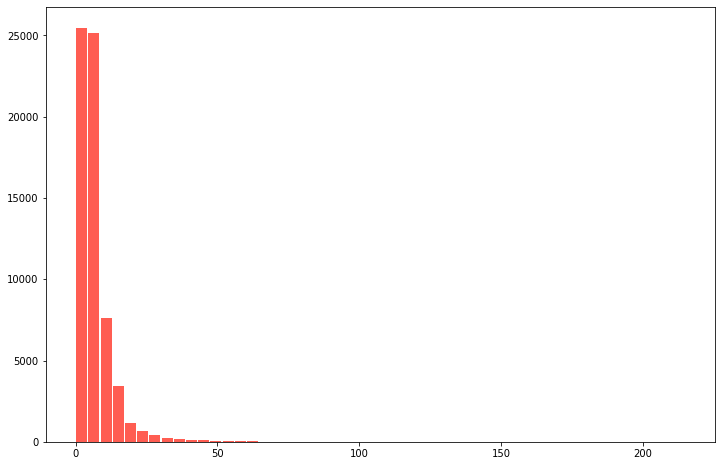

In [13]:
print(df1['util'].hist(bins=50, grid=False, figsize=(12,8), color='#ff5d52', zorder=2, rwidth=0.9))

AxesSubplot(0.125,0.125;0.775x0.755)


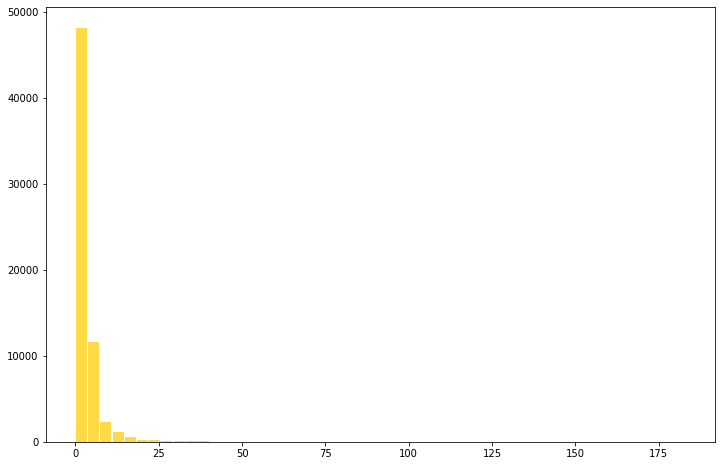

In [14]:
print(df1['divertido'].hist(bins=50, grid=False, figsize=(12,8), color='#ffda47', zorder=2, rwidth=0.9))

AxesSubplot(0.125,0.125;0.775x0.755)


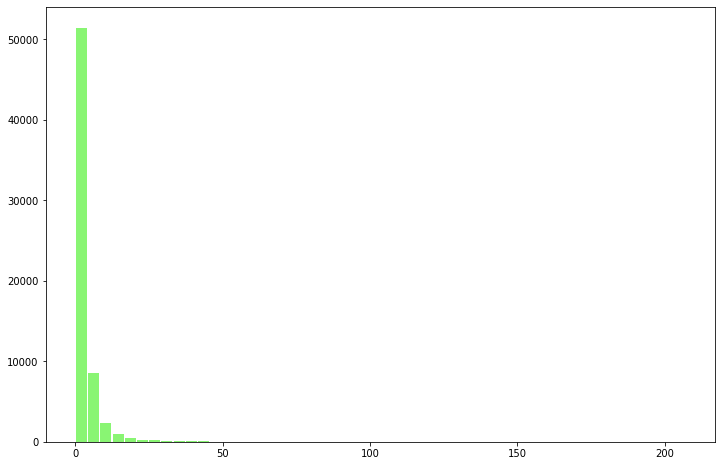

In [15]:
print(df1['guay'].hist(bins=50, grid=False, figsize=(12,8), color='#89f573', zorder=2, rwidth=0.9))

## Análisis de la puntuación

A continuación podemos analizar más en específico el atributo de "puntuación" ya que al ser un valor acotado entre 1 y 5 muestra una distribución más fácil de analizar.

El primer paso es obtener no sólo la media que proporciona la función utilizada anteriormente de "describe()" si no también la mediana y la moda obtenidas con las funciones ".median()" y ".mode()".

In [16]:
df2 = df['puntuacion']
df2.describe()

count    599577.000000
mean          3.722998
std           1.460114
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: puntuacion, dtype: float64

In [17]:
mediana = df["puntuacion"].median()
moda = df["puntuacion"].mode()
print("""Media = 3.722998
Mediana = %d.000000
Moda = %d.000000
""" % (mediana,moda))


Media = 3.722998
Mediana = 4.000000
Moda = 5.000000



Con esto podemos ver que aunque el valor medio de todas las puntuaciones de 3.72, el hecho de que la puntuación mas repetida o moda sea 5.00 hace que el valor de la mediana sea 4.00.

Finalmente, podemos analizar el histograma de puntuación para comprobar como exectivamente, al haber muchas puntuaciones perfectas de 5, tenemos asimetría a derechas (right skewness).

AxesSubplot(0.125,0.125;0.775x0.755)


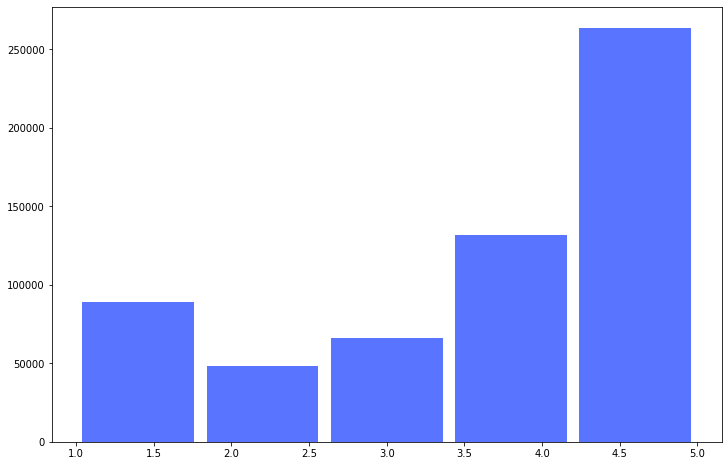

In [18]:
print(df['puntuacion'].hist(bins=5, grid=False, figsize=(12,8), color='#5975ff', zorder=2, rwidth=0.9))

## Análisis de textos duplicados

Finalmente pensamos que sería interesante analizar si existen textos repetidos entre las opiones de todos los usuarios, ya que encontramos algo muy similar al analizar el fichero de consejos.

Primero, encontramos todas las veces que se repite al menos más de una vez, uno de los textos de cualquiera de las opiniones del dataframe. Segundo, hacemos algo muy similar pero asegurándonos que no sólo sea el mismo texto sino también el mismo usuario que lo opina.

In [52]:
# Select all duplicate rows based on one column
duplicates1 = df[df.duplicated(['texto'])]
duplicates1

,usuario_id,negocio_id,puntuacion,util,divertido,guay,texto,fecha,votos_totales
12109,YAnblr3OXf-qAH6h57xpPw,4buRElPC3-ka-s2q55VVFw,1.0,0,0,0,Currently at the airport awaiting my flight......,2018-05-29 01:53:51,0
14616,Uo6OQK6etUOGnhRAbGY1Tw,8lZtLSeJVg28Gb75iklmmQ,1.0,1,0,0,This place is garbage now and it upsets me bec...,2017-04-20 02:52:23,1
20728,upR56wFLwIXk7efFV6Nxcg,znWHLW1pt19HzW1VY6KfCA,1.0,1,0,0,Went for breakfast! Food was horrible! Service...,2014-04-02 03:20:12,1
21917,PmjMwU0LlTQMAqEgEd80OQ,k-NEUIXaPnXtrzCo1MeO7g,1.0,0,0,0,"Don't go here! Yes they are known for ""quick s...",2016-07-14 22:32:42,0
26066,l_TaWIdvOGpieibMFCk84A,vx4YAA02Qz6khRD1fZ1MFA,5.0,0,0,0,My Chinese wife and I ate here late one night...,2018-02-02 04:34:57,0
...,...,...,...,...,...,...,...,...,...
598835,-DxSfohrJheHC_slge6FAw,hCsJv234v62MgdsUU1j8dQ,4.0,0,0,0,Always a great meal here! I love seafood! The ...,2017-06-09 21:16:20,0
598946,RfdwTFlEt_8gE7AeTPljKA,FIJIRYCqOnBMCNY-Sy4-Kg,5.0,0,0,0,I recently got my windshield replaced with Saf...,2018-05-01 18:48:53,0
599011,HCrzNcdX-yI2yifC-PHxoA,2lcK3d4K7FU6O8wXdWzOmA,5.0,0,0,0,Had a quick dinner and was insanely impressed....,2016-12-17 09:00:45,0
599047,2fvcoy3i2N0duw6Rrk29XA,KHZ8NKpNTkK_DKVUHAoJKQ,5.0,0,0,1,My husband Harold and I were there at the Chef...,2017-07-28 08:31:34,1


In [53]:
# Select all duplicate rows based on multiple column names in list
duplicates2 = df[df.duplicated(['usuario_id', 'texto'])]
duplicates2

,usuario_id,negocio_id,puntuacion,util,divertido,guay,texto,fecha,votos_totales
14616,Uo6OQK6etUOGnhRAbGY1Tw,8lZtLSeJVg28Gb75iklmmQ,1.0,1,0,0,This place is garbage now and it upsets me bec...,2017-04-20 02:52:23,1
20728,upR56wFLwIXk7efFV6Nxcg,znWHLW1pt19HzW1VY6KfCA,1.0,1,0,0,Went for breakfast! Food was horrible! Service...,2014-04-02 03:20:12,1
21917,PmjMwU0LlTQMAqEgEd80OQ,k-NEUIXaPnXtrzCo1MeO7g,1.0,0,0,0,"Don't go here! Yes they are known for ""quick s...",2016-07-14 22:32:42,0
26066,l_TaWIdvOGpieibMFCk84A,vx4YAA02Qz6khRD1fZ1MFA,5.0,0,0,0,My Chinese wife and I ate here late one night...,2018-02-02 04:34:57,0
29312,re5t5NFsdmPMEbXmFQk3Zg,uuGL8diLlHfeUeFuod3F-w,1.0,0,1,0,"Pretty awful. Crap service, server didn't both...",2016-10-01 21:50:50,1
...,...,...,...,...,...,...,...,...,...
598835,-DxSfohrJheHC_slge6FAw,hCsJv234v62MgdsUU1j8dQ,4.0,0,0,0,Always a great meal here! I love seafood! The ...,2017-06-09 21:16:20,0
598946,RfdwTFlEt_8gE7AeTPljKA,FIJIRYCqOnBMCNY-Sy4-Kg,5.0,0,0,0,I recently got my windshield replaced with Saf...,2018-05-01 18:48:53,0
599011,HCrzNcdX-yI2yifC-PHxoA,2lcK3d4K7FU6O8wXdWzOmA,5.0,0,0,0,Had a quick dinner and was insanely impressed....,2016-12-17 09:00:45,0
599047,2fvcoy3i2N0duw6Rrk29XA,KHZ8NKpNTkK_DKVUHAoJKQ,5.0,0,0,1,My husband Harold and I were there at the Chef...,2017-07-28 08:31:34,1


Como podemos ver, los resultados son muy interesantes ya que para el primer caso tenemos 1100 instancias y para el segundo 1071. Esto significa que en 29 casos, se ha copiado el mismo texto en distintos usuarios. Desconocemos el motivo y se trata de muy pocos casos pero puede deberse a las razones ya comentadas para el caso de consejos: hackeo, farmeo de puntuación...

Finalmente contamos el número de veces que encontramos un mismo texto para analizar si se trata de un problema serio o simplemente casos aislados y vemos que tan solo se trata de casos aislados ya que el número máximo de repeticiones de un mismo texto es sólo 4.

In [54]:
texto = df.drop(['puntuacion','util', 'divertido', 'guay', 'fecha','votos_totales', 'usuario_id', 'negocio_id',  ], axis=1)
duplicates3 = texto.groupby(texto.columns.tolist(),as_index=False).size().sort_values(ascending = False)
duplicates3.head (60)

texto
Love this place more every time I come here! The food is killer - best sliders & wings in town! Def check out the breakfast too- everything is great!\n Go late night & see Erik the grave bartender - he's AWSM!! Fun Fun time!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [21]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>